In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /home/inflaton/code/sme-invoicing-assistant


In [10]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /home/inflaton/code/sme-invoicing-assistant/.env


True

In [11]:
import pandas as pd
import sqlite3

db_filepath = "results/llama3.2-vision_11b-functionary-medium/emails.db"
# db_filepath = "src/data/db/llama3.2-vision_11b-functionary-medium/emails.db"

conn = sqlite3.connect(db_filepath)

# Write your SQL query
query = "SELECT * FROM emails"

# Read the query results into a pandas DataFrame
df = pd.read_sql(query, conn)

df.head(5)

,email_id,sender_email,recipient_email,subject,email_body,attachments,process_status,response,start_time,end_time,total_time,successful_requests,total_tokens,prompt_tokens,completion_tokens,total_cost
0,93185A89130149C0A842968E4AFDCAA2,RobinLevine@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 43925,Hi Tanya ! Please find attached payment screen...,transaction_1.jpeg,SUCCESS,I apologize for the previous misunderstanding....,2025-01-22T10:46:44.996657,2025-01-22T10:47:10.460331,25.4637,2,608,531,77,0.0
1,614972488B7B411BAEA4814CF066CDAA,StevenNixon@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 51782,Hi Tanya ! Please find attached payment screen...,transaction_2.jpeg,SUCCESS,"I apologize, but it seems there might be some ...",2025-01-22T10:47:10.470287,2025-01-22T10:47:17.779665,7.3094,6,1877,1603,274,0.0
2,C484ABEB38F44D29960B1CEF58510627,MadisonFord@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 42968,Hi Tanya ! Please find attached payment screen...,transaction_3.jpeg,SUCCESS,I am ready to help with reconciling invoices. ...,2025-01-22T10:47:17.789224,2025-01-22T10:47:22.264819,4.4756,12,3743,3204,539,0.0
3,706B3403E8024178948B3BFBF9E64A25,KathrynJones@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 92948,Hi Tanya ! Please find attached payment screen...,transaction_4.jpeg,SUCCESS,"I apologize for the confusion earlier, and tha...",2025-01-22T10:47:22.274375,2025-01-22T10:47:28.012493,5.7381,20,6241,5347,894,0.0
4,86838440CA6C472AACFA3FCE1382609C,ChristineOwens@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 20304,Hi Tanya ! Please find attached payment screen...,transaction_5.jpeg,SUCCESS,I see that you've received an email related to...,2025-01-22T10:47:28.021918,2025-01-22T10:47:35.007028,6.9851,30,9395,8035,1360,0.0


In [12]:
import json

json_file = db_filepath.replace("emails.db", "full_logs.json")

if "full_logs" in df.columns:
    last_completed = df[df["full_logs"] != ""].iloc[-1]
    full_logs = json.loads(last_completed["full_logs"])
    json.dump(full_logs, open(json_file, "w"), indent=4)

    if "results/" in json_file:
        conn.execute("ALTER TABLE emails DROP COLUMN full_logs")
        conn.execute("VACUUM")
        conn.commit()
    print("full_logs saved to", json_file)
else:
    full_logs = json.load(open(json_file))
    print("full_logs loaded from", json_file)

# Close the connection
conn.close()

full_logs loaded from results/llama3.2-vision_11b-functionary-medium/full_logs.json


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   email_id             2000 non-null   object
 1   sender_email         2000 non-null   object
 2   recipient_email      2000 non-null   object
 3   subject              2000 non-null   object
 4   email_body           2000 non-null   object
 5   attachments          2000 non-null   object
 6   process_status       2000 non-null   object
 7   response             2000 non-null   object
 8   start_time           2000 non-null   object
 9   end_time             2000 non-null   object
 10  total_time           2000 non-null   object
 11  successful_requests  2000 non-null   object
 12  total_tokens         2000 non-null   object
 13  prompt_tokens        2000 non-null   object
 14  completion_tokens    2000 non-null   object
 15  total_cost           2000 non-null   object
dtypes: obj

In [14]:
df.describe()

,email_id,sender_email,recipient_email,subject,email_body,attachments,process_status,response,start_time,end_time,total_time,successful_requests,total_tokens,prompt_tokens,completion_tokens,total_cost
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,2000,1988,1,1947,2000,1001,3,1956,2000,2000,1988,2000,2000,2000,2000,1
top,0527b19a-4b60-4768-9c45-c23fb3bc1ffa,MichaelJones@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice I13212,Subject: Payment Confirmation for Invoice I178...,,SUCCESS,"I'm sorry for any confusion, but I don't have ...",2025-01-23T01:45:37.215864,2025-01-23T01:46:07.094598,5.3255,406945,214124135,187016945,27107190,0.0
freq,1,3,2000,3,1,1000,1876,19,1,1,2,1,1,1,1,2000


In [15]:
df["process_status"].value_counts()

process_status
SUCCESS        1876
NOT_INVOICE     101
ERROR            23
Name: count, dtype: int64

In [16]:
# plot the distribution of categories
import matplotlib.pyplot as plt


def plot_value_distribution(df2, col="category", top_n=10):
    df2[col].value_counts()[:top_n].plot(kind="bar")
    plt.title(f"Distribution of {col}")

    # add the count on top of the bars
    for i in range(len(df2[col].value_counts()[:top_n])):
        count = df2[col].value_counts().values[i]
        plt.text(i, count, count, ha="center")

    plt.show()

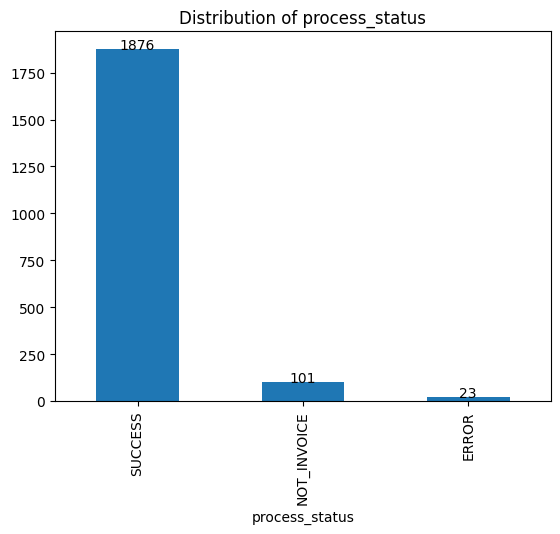

In [17]:
plot_value_distribution(df, "process_status")

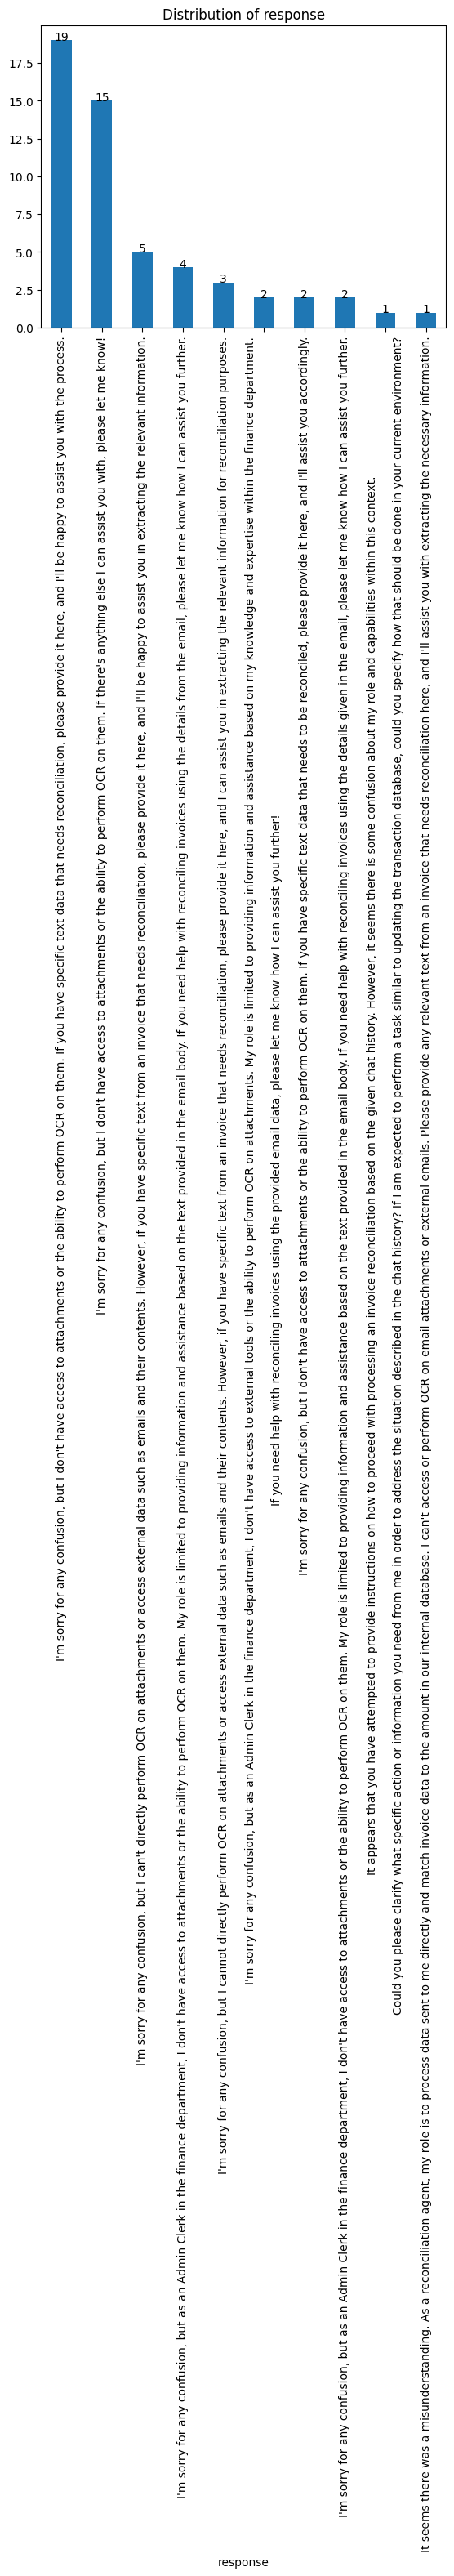

In [18]:
plot_value_distribution(df, "response")

In [19]:
df["end_time"] = pd.to_datetime(df["end_time"])
df["start_time"] = pd.to_datetime(df["start_time"])
df["duration"] = (df["end_time"] - df["start_time"]).dt.total_seconds()

In [20]:
df[["duration", "total_time"]].head()

,duration,total_time
0,25.463674,25.4637
1,7.309378,7.3094
2,4.475595,4.4756
3,5.738118,5.7381
4,6.985110,6.9851


<Axes: ylabel='Frequency'>

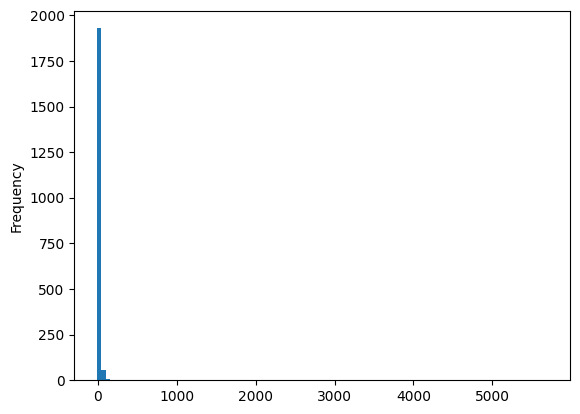

In [21]:
# plot the distribution of duration
df["duration"].plot(kind="hist", bins=100)

In [22]:
df[df["duration"] > 150]

,email_id,sender_email,recipient_email,subject,email_body,attachments,process_status,response,start_time,end_time,total_time,successful_requests,total_tokens,prompt_tokens,completion_tokens,total_cost,duration
441,0E84B646192C4933A481A2A5EE462A16,LukeWilson@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 18245,Hi Tanya ! Please find attached payment screen...,transaction_442.jpeg,SUCCESS,I apologize for any inconvenience caused by my...,2025-01-22 12:04:15.595443,2025-01-22 13:39:19.410279,5703.8148,276780,103407791,86761222,16646569,0.0,5703.814836
470,9D17F88A197346F39EF0673379C2728C,ChristopherMiller@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 63357,Hi Tanya ! Please find attached payment screen...,transaction_471.jpeg,SUCCESS,"I'm sorry, but it seems that there was an issu...",2025-01-22 13:44:12.079953,2025-01-22 14:21:10.218993,2218.1390,315690,120924151,98984970,21939181,0.0,2218.139040
863,927E729619D944C584132ECE513F18F7,MeaganStokes@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 73432,Hi Tanya ! Please find attached payment screen...,transaction_864.jpeg,SUCCESS,"I apologize for any confusion, but I don't hav...",2025-01-22 15:31:04.738256,2025-01-22 15:33:40.000939,155.2627,1068371,458057224,336701344,121355880,0.0,155.262683
1069,91ad9dca-2b7f-4488-bee2-88370a4fb3c4,melindastewart@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice I15694,Subject: Payment Confirmation for Invoice I156...,,SUCCESS,I apologize for the mistake. Please disregard ...,2025-01-22 16:13:27.809088,2025-01-22 16:19:48.887223,381.0781,1641678,703415509,519106207,184309302,0.0,381.078135
1229,6f2f46bd-46cc-40ad-acdf-f073d3ad941d,kevinstephenson@example.net,tanya.official.456@gmail.com,Payment Confirmation for Invoice I11240,Subject: Payment Confirmation for Invoice I112...,,SUCCESS,I apologize for any confusion earlier. It seem...,2025-01-22 16:53:01.576644,2025-01-22 17:17:01.646367,1440.0697,2166184,933903912,695104974,238798938,0.0,1440.069723
1248,dd0301b7-2099-4f77-94e8-1d9fde2715ac,rwarren@example.net,tanya.official.456@gmail.com,Payment Confirmation for Invoice I18423,Subject: Payment Confirmation for Invoice I184...,,SUCCESS,Please restate your question or provide more c...,2025-01-22 17:19:42.010197,2025-01-22 17:52:05.921905,1943.9117,2236987,966065488,719590921,246474567,0.0,1943.911708


In [23]:
df["duration"].describe()

count    2000.000000
mean       17.688931
std       147.488799
min       -11.691004
25%         6.011985
50%         7.440020
75%        10.884334
max      5703.814836
Name: duration, dtype: float64

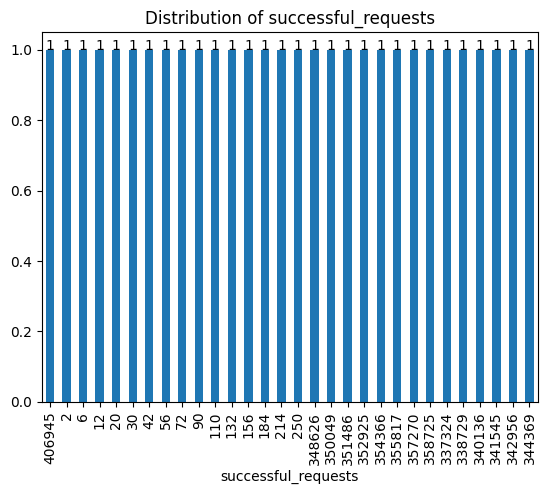

In [24]:
plot_value_distribution(df, "successful_requests", top_n=30)

In [25]:
df["process_status"].value_counts()

process_status
SUCCESS        1876
NOT_INVOICE     101
ERROR            23
Name: count, dtype: int64

In [26]:
success_rate = df["process_status"].value_counts()["SUCCESS"] / len(df)
success_rate

0.938

In [27]:
def total_power_in_watt(file_path):
    df = pd.read_csv(file_path)
    return df["CPU Package Power [W]"].mean() + df["GPU Power [W]"].mean()

In [28]:
power_idle = total_power_in_watt("results/power_idle.csv")
power_idle

29.873

In [30]:
power_with_vision = total_power_in_watt(
    "results/llama3.2-vision_11b-functionary-medium/power_with_vision.csv"
)
power_without_vision = total_power_in_watt(
    "results/llama3.2-vision_11b-functionary-medium/power_without_vision.csv"
)
power_with_vision, power_without_vision

(314.514, 313.5394)

In [31]:
mean_response_time = df["duration"].mean()
mean_response_time

17.6889310215

In [32]:
average_energy_consumption = (
    (power_with_vision + power_without_vision) / 2 - power_idle
) * mean_response_time
average_energy_consumption

5026.375198804005

In [33]:
df.describe()

,start_time,end_time,duration
count,2000,2000,2000.000000
mean,2025-01-22 17:20:52.064708352,2025-01-22 17:21:09.753639424,17.688931
min,2025-01-22 10:46:44.996657,2025-01-22 10:47:10.460331,-11.691004
25%,2025-01-22 14:26:57.187982848,2025-01-22 14:27:37.017949696,6.011985
50%,2025-01-22 15:58:34.001075968,2025-01-22 15:58:41.908803072,7.440020
75%,2025-01-22 23:54:55.808403712,2025-01-22 23:55:04.338949632,10.884334
max,2025-01-23 01:45:37.215864,2025-01-23 01:46:07.094598,5703.814836
std,NaN,NaN,147.488799


In [34]:
row = df[df["process_status"] == "NOT_INVOICE"].iloc[0]
row

email_id                                0161BF9A0D8044D687F7E37CD149FE17
sender_email                                   SamanthaBrown@example.com
recipient_email                             tanya.official.456@gmail.com
subject                       Payment Confirmation for Invoice ID: 32819
email_body             Hi Tanya ! Please find attached payment screen...
attachments                                          transaction_34.jpeg
process_status                                               NOT_INVOICE
response               Based on the provided chat history, there is n...
start_time                                    2025-01-22 10:50:55.587780
end_time                                      2025-01-22 10:51:02.528775
total_time                                                        6.9410
successful_requests                                                 1392
total_tokens                                                      446715
prompt_tokens                                      

In [35]:
full_logs[0]

{'name': 'input',
 'type': 'HumanMessage',
 'content': '\n                Help to reconcile invoices using the following email:\n\n                \n            Sender: rowlandcraig@example.org\n            Subject: Payment Confirmation for Invoice I18714\n            Body: Subject: Payment Confirmation for Invoice I18714\n                Tanya Brown <rowlandcraig@example.org>\n                Tue, Jan 07, 2025, 11:51 PM\n                Dear Tanya, I hope this message finds you well.I am writing to confirm that we have successfully made the payment for Invoice I18714, related to our recent order with you. Here are the details:  \n                Description:\n                Invoice Date: December 18, 2024\n                Item: Western Shirts Men\n                Quantity: 4\n                Subtotal: $129.43\n                Tax (10%): $12.94\n                Shipping (if applicable): $16.17\n                Total Amount paid: $158.54\n                Transaction Reference Number - 

In [36]:
for i, log in enumerate(full_logs):
    if row["attachments"] in log["content"]:
        print(i)
        break

In [37]:
full_logs[i : i + 5]

[{'name': 'senior_reconciliation_agent',
  'type': 'AIMessage',
  'content': 'It appears that you have already requested the invoice data for Invoice I17800 from our transaction database. Please provide me with the results of the query so that I can proceed with the reconciliation process.',
  'timestamp': '2025-01-23T01:46:07.094558',
  'usage': {'input_tokens': 891,
   'output_tokens': 40,
   'total_tokens': 931,
   'input_token_details': {},
   'output_token_details': {}},
  'model_name': 'functionary-medium',
  'additional_kwargs': {}}]